# Noise reduction

The simplest way to reduce noise is to slightly blur the image, for example using a gaussian or median filter.

In [1]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt


In [2]:
# load zfish image and extract a channel
zfish_image = imread('../../data/zfish_eye.tif')[:,:,0]

cropped_zfish = zfish_image[630:730, 500:600]

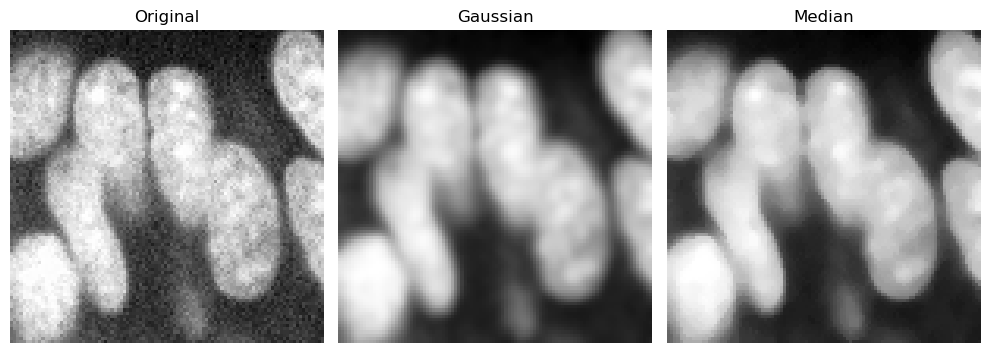

In [3]:
from skimage.filters import median, gaussian
from skimage.morphology import disk

zfish_gaussian = gaussian(cropped_zfish, sigma=1.5, preserve_range=True)
zfish_median = median(cropped_zfish, footprint=disk(3))

fig, axs = plt.subplots(1, 3, figsize=(10,10))

imshow(cropped_zfish, plot=axs[0])
axs[0].set_title("Original")
imshow(zfish_gaussian, plot=axs[1])
axs[1].set_title("Gaussian")
imshow(zfish_median, plot=axs[2])
axs[2].set_title("Median")
for ax in axs:
    ax.axis('off')
plt.tight_layout()

# Background removal filters
There are also background removal filters. If there is a more or less homogeneous intensity spread over the whole image, potentially increasing in a direction, it is recommended to remove this background before segmenting the image.

As example image, we will work with a zebrafish eye data set (Courtesy of Mauricio Rocha Martins, Norden lab, MPI CBG). As you can see, there is some intensity spread around the nuclei we want to segment later on. The source of this background signal is out-of-focus light.

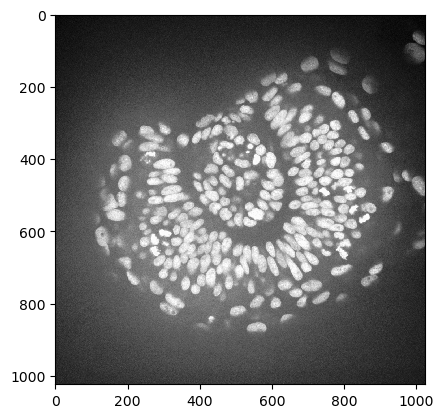

In [4]:

imshow(zfish_image)

To subtract the background, we need to determine it first. There are several algorithms that are useful for removing inhomogeneous background.

## Rolling ball algorithm

Well known to FIJI users, the [rolling-ball algorithm](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_rolling_ball.html) is still widely used to remove background. The radius parameter determines the largest object that should not be considered background.

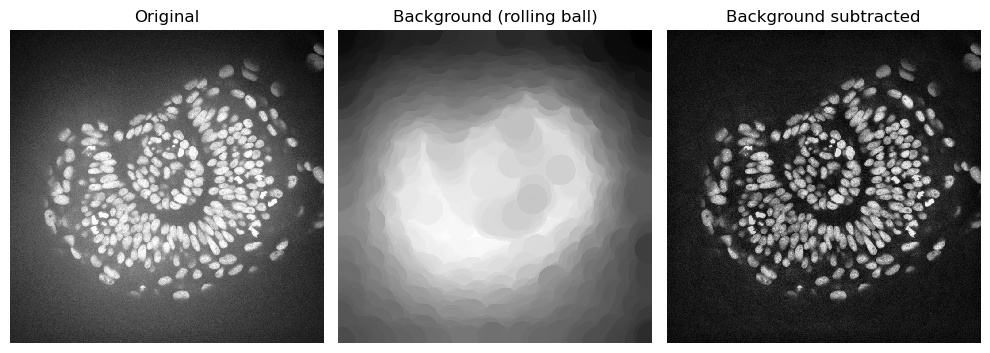

In [5]:
from skimage.restoration import rolling_ball

background_rolling = rolling_ball(zfish_image, radius=50)

zfish_rolling = zfish_image - background_rolling

fig, axs = plt.subplots(1, 3, figsize=(10,10))

imshow(zfish_image, plot=axs[0])
axs[0].set_title("Original")
imshow(background_rolling, plot=axs[1])
axs[1].set_title("Background (rolling ball)")
imshow(zfish_rolling, plot=axs[2])
axs[2].set_title("Background subtracted")
for ax in axs:
    ax.axis('off')
plt.tight_layout()

## Tophat filter
The [white_tophat](https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html#white-tophat) filter gives very similar results to the rolling ball algorithm, but is algorithmically much simpler. The footprint parameter determines the largest object that should not be considered background:

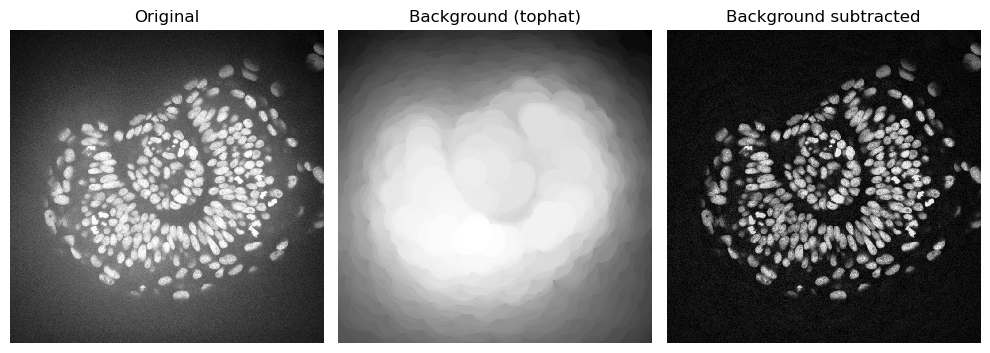

In [6]:
from skimage.morphology import disk, white_tophat

zfish_tophat = white_tophat(zfish_image, footprint=disk(50))

background_tophat = zfish_image - zfish_tophat

fig, axs = plt.subplots(1, 3, figsize=(10,10))

imshow(zfish_image, plot=axs[0])
axs[0].set_title("Original")
imshow(background_tophat, plot=axs[1])
axs[1].set_title("Background (tophat)")
imshow(zfish_tophat, plot=axs[2])
axs[2].set_title("Background subtracted")
for ax in axs:
    ax.axis('off')
plt.tight_layout()

## Gaussian blur

A simple gaussian blur can also be used to estimate the background:

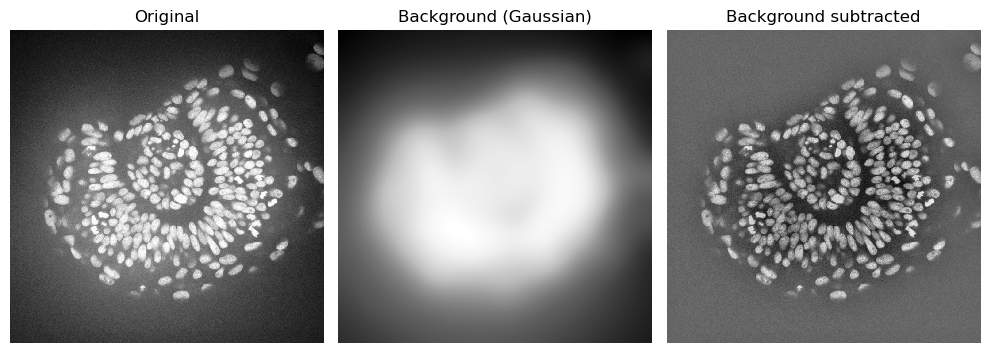

In [7]:
from skimage.filters import gaussian

background_gaussian = gaussian(zfish_image, sigma=50, preserve_range=True)

zfish_gaussian = zfish_image - background_gaussian

fig, axs = plt.subplots(1, 3, figsize=(10,10))

imshow(zfish_image, plot=axs[0])
axs[0].set_title("Original")
imshow(background_gaussian, plot=axs[1])
axs[1].set_title("Background (Gaussian)")
imshow(zfish_gaussian, plot=axs[2])
axs[2].set_title("Background subtracted")
for ax in axs:
    ax.axis('off')
plt.tight_layout()

## Comparing different algorithms

Which one is your favorite algorithm?

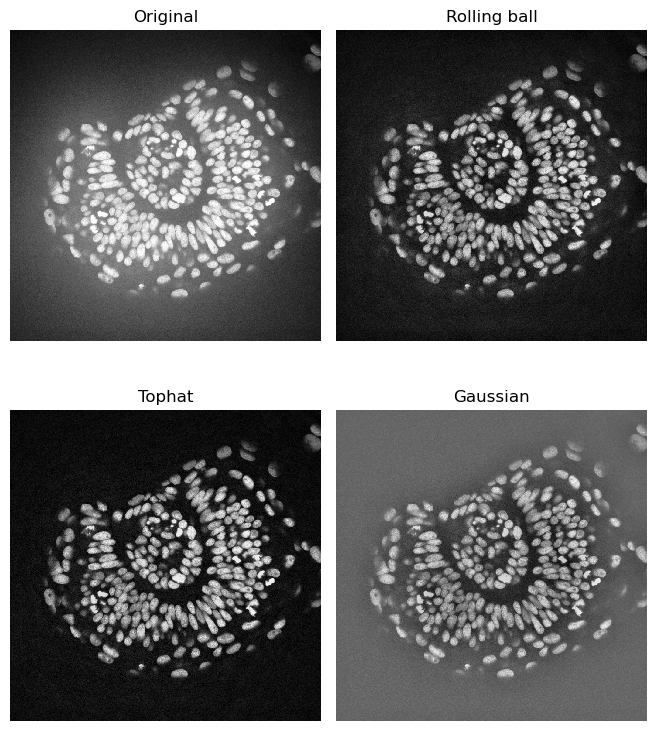

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(6.67,8))

imshow(zfish_image, plot=axs[0,0])
axs[0,0].set_title("Original")
imshow(zfish_rolling, plot=axs[0,1])
axs[0,1].set_title("Rolling ball")
imshow(zfish_tophat, plot=axs[1,0])
axs[1,0].set_title("Tophat")
imshow(zfish_gaussian, plot=axs[1,1])
axs[1,1].set_title("Gaussian")
for ax in axs.ravel():
    ax.axis('off')
plt.tight_layout()

## Difference of Gaussians
In many cases, background subtraction is combined with denoising. The [Difference of Gaussians (DoG)](https://scikit-image.org/docs/stable/auto_examples/filters/plot_dog.html) performs both operations in one function.

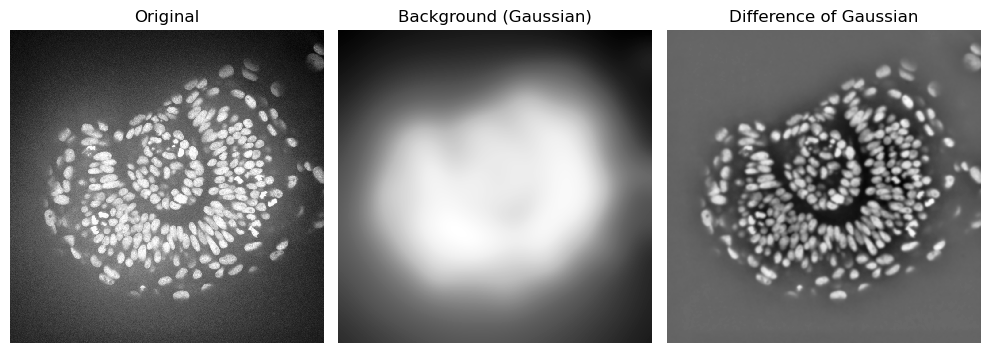

In [9]:
from skimage.filters import difference_of_gaussians

zfish_difference_of_gaussians = difference_of_gaussians(zfish_image, 3, 50)

fig, axs = plt.subplots(1, 3, figsize=(10,10))

imshow(zfish_image, plot=axs[0])
axs[0].set_title("Original")
imshow(background_gaussian, plot=axs[1])
axs[1].set_title("Background (Gaussian)")
imshow(zfish_difference_of_gaussians, plot=axs[2])
axs[2].set_title("Difference of Gaussian")
for ax in axs:
    ax.axis('off')
plt.tight_layout()

# Edge detection

Edge detection highlights parts of the image where the signal intensity _changes_ strongly.

A common filter for edge detection is the `laplace` filter

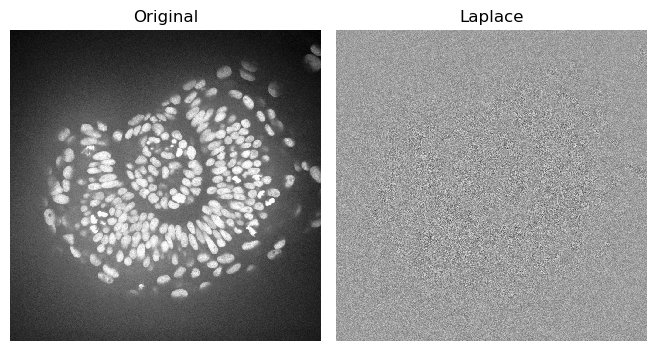

In [10]:
from skimage.filters import laplace

zfish_laplace = laplace(zfish_image, ksize=5)

fig, axs = plt.subplots(1, 2, figsize=(6.67,10))

imshow(zfish_image, plot=axs[0])
axs[0].set_title("Original")
imshow(zfish_laplace, plot=axs[1])
axs[1].set_title("Laplace")
for ax in axs:
    ax.axis('off')
plt.tight_layout()

Oops, I guess the image was too noisy. Let's use what we have learned above and apply the laplacian to an image where we reduced the noise

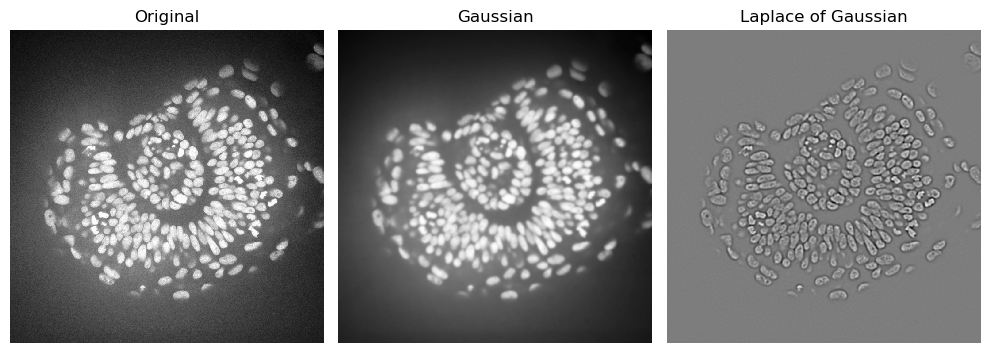

In [11]:
zfish_gaussian = gaussian(zfish_image, sigma=3)
zfish_laplacian_of_gaussian = laplace(zfish_gaussian)

fig, axs = plt.subplots(1, 3, figsize=(10,10))

imshow(zfish_image, plot=axs[0])
axs[0].set_title("Original")
imshow(zfish_gaussian, plot=axs[1])
axs[1].set_title("Gaussian")
imshow(zfish_laplacian_of_gaussian, plot=axs[2])
axs[2].set_title("Laplace of Gaussian")
for ax in axs:
    ax.axis('off')
plt.tight_layout()

# Exercise 1

compare the different algorithms again but now add `min_display_intensity=0` to the parameters of `imshow`.

Does that change your assessment of the algorithms?
What are the implications for further processing of your image?

## Exercise 2
Apply different algorithms and radii to remove the background in the zebrafish eye dataset. Zoom into the dataset using cropping and figure out how to make the background go away optimally.